<a href="https://colab.research.google.com/github/desakim/ESAA_OB/blob/main/desakim_ob1124_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기한: 11월 27일 (월) 18:30

파이썬 딥러닝 텐서플로 ch4. 1~3

pg. 142~181 필사하여 깃허브에 업로드한 뒤, 깃허브 링크를 댓글로 달아주세요. -> 발표는 142-162

# Part 04. 합성곱 신경망 (CNN)

## 01. 합성곱 신경망
CNN(Convolutional Neural Network):

데이터가 가진 특징들의 패턴을 학습하는 알고리즘. 컴퓨터 비전 분야에서 많이 사용. 이미지 분류, 객체 탐지, 스타일 전이 등

###1-1. 이미지 표현

이미지(또는 영상)는 숫자로 표현해야 함. 픽셀이나 채널 이미지 사용

###1-2. 합성곱 (Convolution)
합성곱 연산: 입력 이미지에 대해 일반적으로 정방형 크기를 가지는 커널(kernel)을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법.

-> 특성맵(feature): 합성곱 연산을 통해 추출된 이미지

###1-3. 채널 (Channel)

채널: 입력 이미지를 구성하는 2차원 배열의 개수

흑백은 채널 1개, RGB 컬러 이미지는 채널 3개

합성곱 연산을 수행할 때 특성맵의 생성 과정을 잘 살펴봐야 함

* 입력 이미지의 채널 개수만큼 커널 생성됨

* 각 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행함

-> 입력 이미지의 채널 개수만큼 합성곱 연산된 결과 생성됨, elementwise 덧셈 연산으로 모두 더해주면 최종 특성맵 생성됨

(1개 커널의 사이즈) x (입력 채널 수) x (출력 필터 수) = (커널 수)

에 (bias 개수)를 더하면 -> 총 업데이트될 파라미터의 개수

###1-4. 스트라이드 (stride)

스트라이드(stride): 커널이 이동하는 간격. 주로 1 또는 2로 설정.

n픽셀씩 우측으로 이동하며, 우측 끝까지 이동했다면 아래로 n칸 좌측 첫 번째로 이동하여 추출함

텐서플로 케라스에서 제공하는 Conv2D 레이어의 strides 매개변수에 스트라이드를 지정할 수 있음.

###1-5. 패딩(padding)
추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩을 설정할 수 있음. 일반적으로 zero-padding 사용.

텐서플로 케라스의 Covn2D 레이어에서 padding = 'same'으로 설정하면 zero-padding을 적용함. 기본값은 padding = 'valid' 임

###1-6. 특성맵 (feature map) 사이즈

패딩과 스트라이드를 적용하고 입력데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식

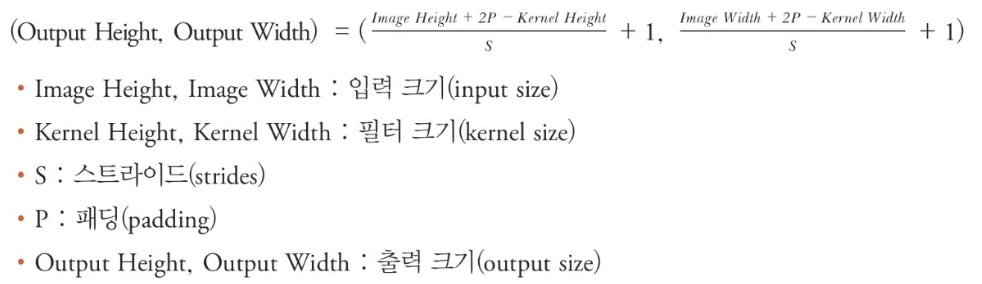

###1-7. 풀링 (pooling)
풀링(pooling)레이어: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어

이미지 축소를 통해 연산량을 감소한다는 점과 overfitting을 방지하는 이점이 있음

최대 풀링(max pooling)과 평균 풀링(average pooling)으로 분류

* 최대 풀링: 특징의 값이 큰 값이 다른 특징을 대표한다는 개념으로 도입. 합성곱 신경망과 같이 주로 사용.

## 02. 간단한 모델 생성

###2-1. 데이터 로드 및 전처리

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


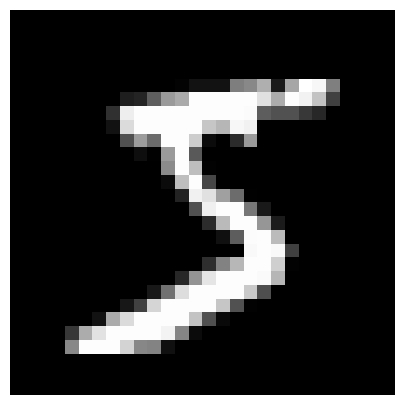

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


역시 0~255 값.

In [5]:
# 정규화(Normalization)
x_train=x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


mnist 데이터셋은 색상을 나타내는 채널이 1개. CNN 모델에 주입하기 위해 색상을 나타내는 채널을 추가해주자.

tf.newaxis 축을 텐서 배열에 직접 추가하는 방식을 통해 (60000, 28, 28) -> (60000, 28, 28, 1)로 변환하자. [] 안에서 추가하고자 하는 위치에 작성하면 된다.

In [6]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in=x_train[..., tf.newaxis]
x_valid_in=x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


###2-2. Sequential API로 모델 생성 및 학습

In [7]:
# Sequential API를 사용해 샘플 모델 생성
model=tf.keras.Sequential([
    #Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),
    #max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    #classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

앞서 정의한 모델 구조에 손실함수, 옵티마이저, 평가지표를 설정해주고 컴파일하면 모델 인스턴스가 생성된다. fit 해보자.

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2173 - accuracy: 0.9388 - val_loss: 0.0908 - val_accuracy: 0.9729
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0773 - accuracy: 0.9775 - val_loss: 0.0666 - val_accuracy: 0.9791
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0578 - accuracy: 0.9828 - val_loss: 0.0579 - val_accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0512 - val_accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.0592 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0530 - val_accuracy: 0.9824
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0287 - accuracy: 0.9914 - val_loss: 0.0514 -

In [9]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.0566 - accuracy: 0.9840


[0.056596674025058746, 0.984000027179718]

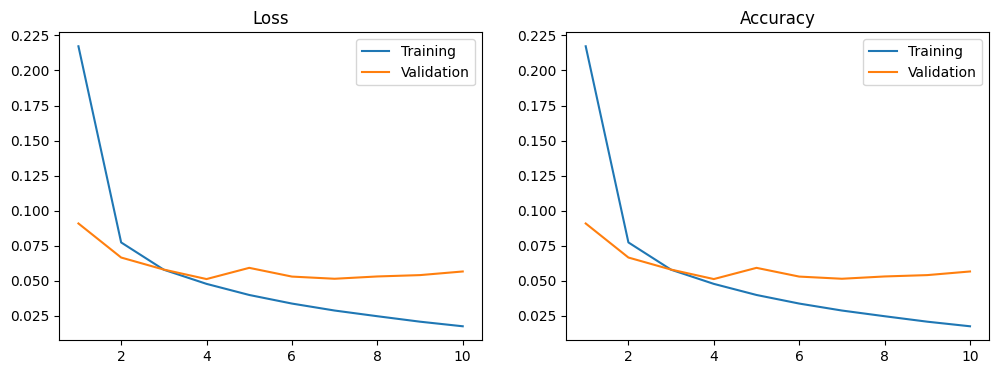

In [10]:
def plot_loss_acc(history, epoch):
  loss, val_loss=history.history['loss'], history.history['val_loss']
  acc, val_acc=history.history['accuracy'], history.history['val_accuracy']

  fig, axes=plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label='Training')
  axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

###2-3. 모델 구조 파악

In [11]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


생성된 모델 인스턴스의 input 속성으로부터 입력 레이어의 텐서를 추출할 수 있다. (None, 28, 28, 1) 형태에서 none은 배치 크기가 들어오는 위치로 어떤 값이든 가능하다는 의미.

In [12]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [13]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

10개의 노드를 갖는 1차원 벡터 형태.

모델을 구성하는 레이어를 추출하려면 layers 속성 확인.

In [14]:
# 레이어
model.layers

In [15]:
# 첫 번째 레이어 선택
model.layers[0]

In [16]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
# 첫 번재 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [18]:
# 첫 번재 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 3.02969605e-01,  3.16743582e-01, -5.31830370e-01,
            3.03344458e-01,  3.74010801e-01,  4.16515946e-01,
            4.44129929e-02,  1.85460418e-01, -1.32377577e+00,
           -7.70255685e-01, -4.55067933e-01,  1.58123642e-01,
            2.83330441e-01,  3.31528008e-01,  2.47364476e-01,
            4.10725743e-01, -5.54689206e-02, -4.24737275e-01,
           -1.22963762e+00, -6.01860702e-01, -7.92681754e-01,
            7.17507541e-01, -1.15167968e-01, -1.16293281e-01,
            4.79112029e-01,  2.98044562e-01, -5.08218825e-01,
            5.09688973e-01, -7.80938804e-01, -2.98470557e-01,
           -7.85681605e-01, -7.55357206e-01]],
 
         [[ 4.57868308e-01,  1.70492023e-01, -2.34715089e-01,
            9.61264130e-03,  7.42744654e-02, -4.93252754e-01,
           -1.64582133e-02, -4.05068845e-01, -6.52529240e-01,
           -5.41656852e-01,  3.61173898e-01, -1.95062846e-01,
           

In [19]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 3.02969605e-01,  3.16743582e-01, -5.31830370e-01,
           3.03344458e-01,  3.74010801e-01,  4.16515946e-01,
           4.44129929e-02,  1.85460418e-01, -1.32377577e+00,
          -7.70255685e-01, -4.55067933e-01,  1.58123642e-01,
           2.83330441e-01,  3.31528008e-01,  2.47364476e-01,
           4.10725743e-01, -5.54689206e-02, -4.24737275e-01,
          -1.22963762e+00, -6.01860702e-01, -7.92681754e-01,
           7.17507541e-01, -1.15167968e-01, -1.16293281e-01,
           4.79112029e-01,  2.98044562e-01, -5.08218825e-01,
           5.09688973e-01, -7.80938804e-01, -2.98470557e-01,
          -7.85681605e-01, -7.55357206e-01]],

        [[ 4.57868308e-01,  1.70492023e-01, -2.34715089e-01,
           9.61264130e-03,  7.42744654e-02, -4.93252754e-01,
          -1.64582133e-02, -4.05068845e-01, -6.52529240e-01,
          -5.41656852e-01,  3.61173898e-01, -1.95062846e-01,
           4.07975554e-01,  

In [20]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.02576779, -0.3959551 , -0.01890315, -0.31854162, -0.36170045,
       -0.3113551 , -0.20380135, -0.17567618,  0.21590951, -0.07296918,
       -0.09637447, -0.08442141, -0.28240925, -0.41167265, -0.3037512 ,
       -0.3645685 , -0.00212218, -0.00750999, -0.02798456, -0.253941  ,
       -0.05947366, -0.00958353, -0.19357647, -0.01051172, -0.13074592,
       -0.29052794, -0.28031757, -0.00187261, -0.24776788, -0.09157941,
       -0.07295367,  0.02118201], dtype=float32)>

In [21]:
# 레이어 이름 사용해 레이어 선택
model.get_layer('conv')

In [22]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator=tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 75ms/step


2

In [23]:
# 첫 번재 레이어 conv의 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

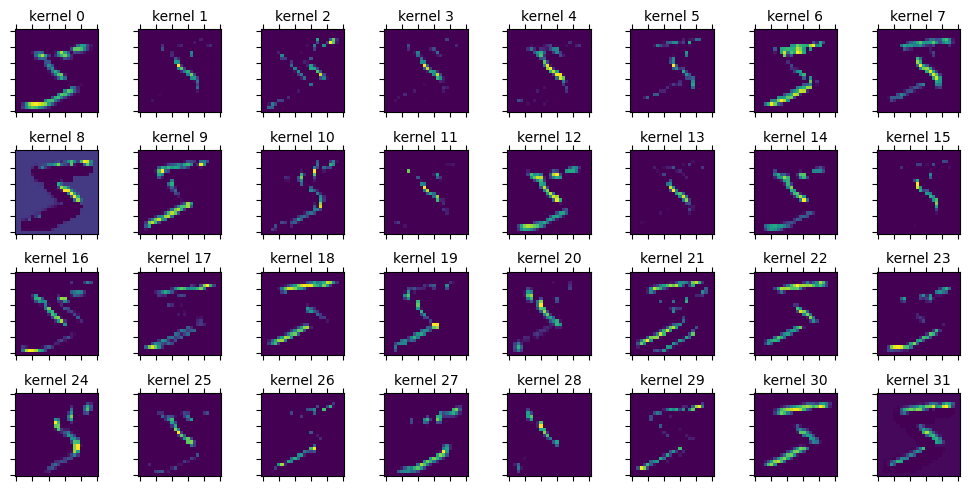

In [24]:
# Convolution 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()


In [25]:
# 두번째 레이어 pool 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


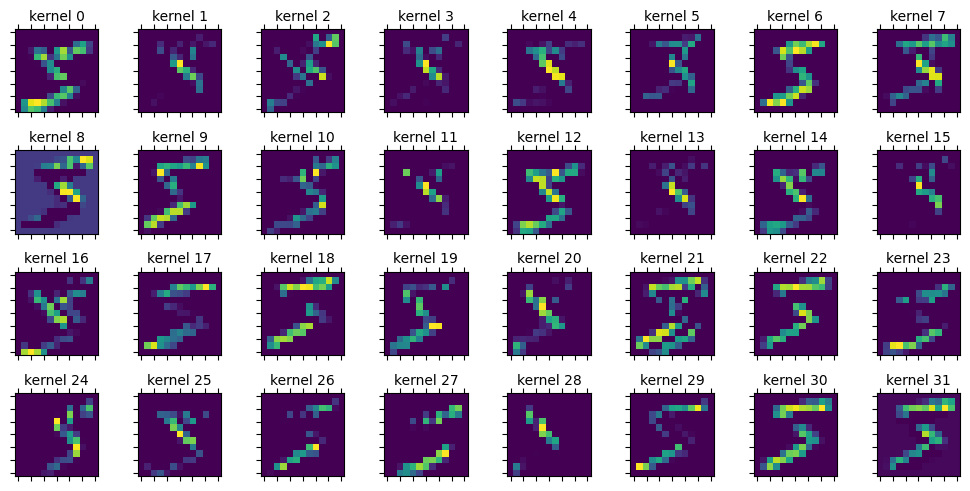

In [26]:
# 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## 03. 복잡한 모델 생성

###3-1. 데이터셋 준비

In [28]:
import tensorflow as tf
import numpy as np

#mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [29]:
# 새로운 출력 값 배열 생성 (홀수 : 1, 짝수 : 0)
y_train_odd=[]
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd=np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [30]:
# 잘 정리되었다
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [31]:
# Validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [32]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

# 채널 추가
x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


###3-2. Functional API로 다중 입력, 다중 출력 레이어 생성

In [27]:
# Functional API 를 사용하여 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1))

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

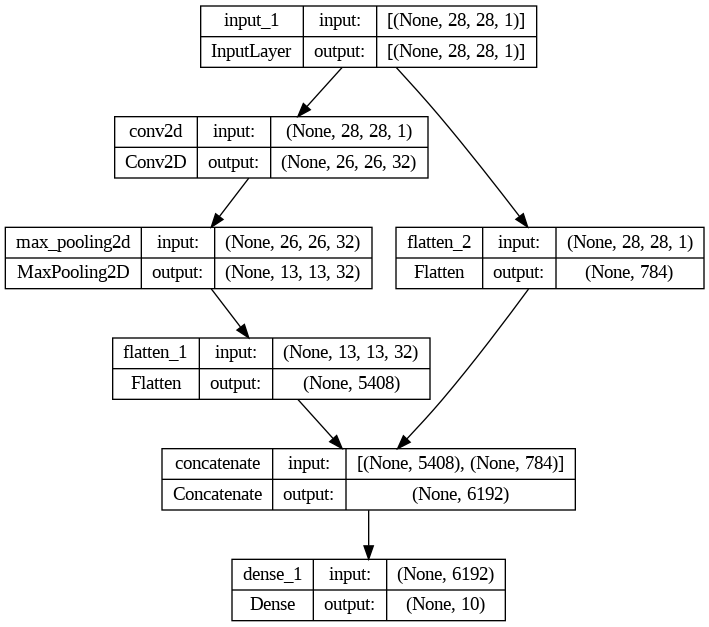

In [33]:
# 모델 구조 출력 및 이미지 파일로 저장
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [34]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1995 - accuracy: 0.9424 - val_loss: 0.0939 - val_accuracy: 0.9725
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0811 - accuracy: 0.9766 - val_loss: 0.0647 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.0643 - val_accuracy: 0.9785
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0593 - val_accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.0526 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0522 - val_accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0568 -

###3-3. 다중 출력 분류 모델


In [35]:
# Functional API를 사용해 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [36]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


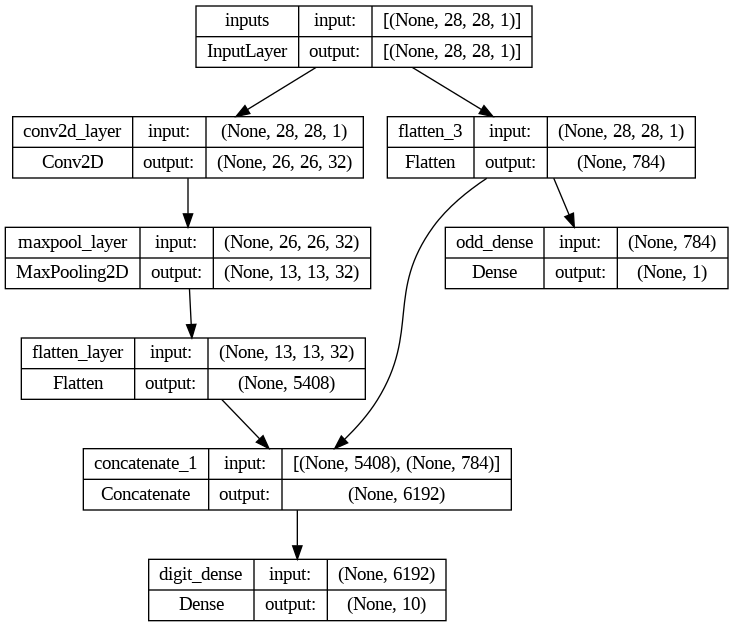

In [37]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [38]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history=model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.3708 - digit_dense_loss: 0.2069 - odd_dense_loss: 0.3279 - digit_dense_accuracy: 0.9407 - odd_dense_accuracy: 0.8624 - val_loss: 0.2244 - val_digit_dense_loss: 0.0862 - val_odd_dense_loss: 0.2764 - val_digit_dense_accuracy: 0.9740 - val_odd_dense_accuracy: 0.8880
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2144 - digit_dense_loss: 0.0786 - odd_dense_loss: 0.2716 - digit_dense_accuracy: 0.9775 - odd_dense_accuracy: 0.8923 - val_loss: 0.2010 - val_digit_dense_loss: 0.0675 - val_odd_dense_loss: 0.2670 - val_digit_dense_accuracy: 0.9777 - val_odd_dense_accuracy: 0.8933
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1920 - digit_dense_loss: 0.0605 - odd_dense_loss: 0.2630 - digit_dense_accuracy: 0.9820 - odd_dense_accuracy: 0.8959 - val_loss: 0.1927 - val_digit_dense_loss: 0.0625 - val_odd_dense_loss: 0.2603 - val_digit_dense_accuracy: 0.9802 -

[0.1952163726091385,
 0.06649040430784225,
 0.257451593875885,
 0.9818000197410583,
 0.9010000228881836]

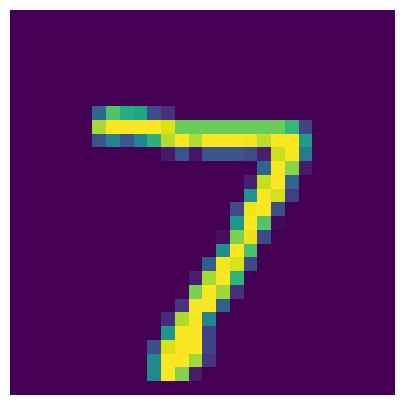

In [39]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [40]:
digit_preds, odd_preds=model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 1s 4ms/step
[1.8801885e-11 5.8588724e-11 5.4660126e-10 4.0042849e-07 5.0223042e-12
 2.4537721e-11 5.1500204e-20 9.9999946e-01 6.2049099e-09 7.8838376e-08]
[0.9993514]


In [41]:
digit_labels=np.argmax(digit_preds, axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [42]:
odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-42-b68f671b10f9>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

###3-4. 전이 학습

In [43]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output=model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


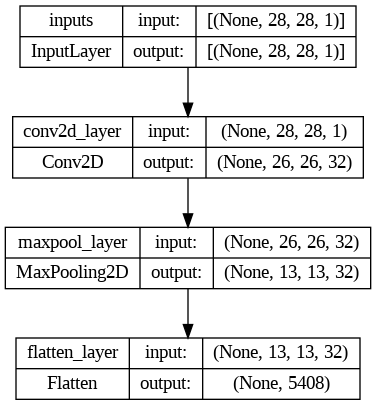

In [44]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [45]:
# Sequential API 적용
digit_model=tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


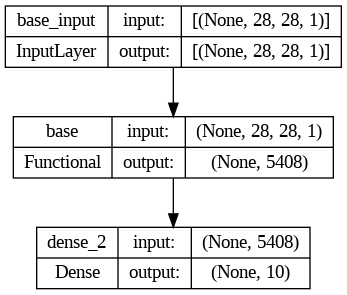

In [46]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [47]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1307 - accuracy: 0.9630 - val_loss: 0.0639 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.0572 - val_accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0439 - accuracy: 0.9870 - val_loss: 0.0511 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.0524 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0495 - val_accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0244 - accuracy: 0.9927 - val_loss: 0.0498 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0560 -

In [48]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [49]:
# Functional API 적용
dense_output=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen=tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [51]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)

base_model_frozen2=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [52]:
# Functional API 적용
dense_output2=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2=tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [53]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1161 - accuracy: 0.9686 - val_loss: 0.0548 - val_accuracy: 0.9833
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0495 - accuracy: 0.9855 - val_loss: 0.0537 - val_accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0357 - accuracy: 0.9894 - val_loss: 0.0485 - val_accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0492 - val_accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0222 - accuracy: 0.9935 - val_loss: 0.0509 - val_accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0508 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0150 - accuracy: 0.9956 - val_loss: 0.0540 - val_ac